param_num: 450340
22.15091445312499
param_num: 450340
38.76410029296873
param_num: 450340
6.310826299804685
param_num: 450340
14.725261366210944


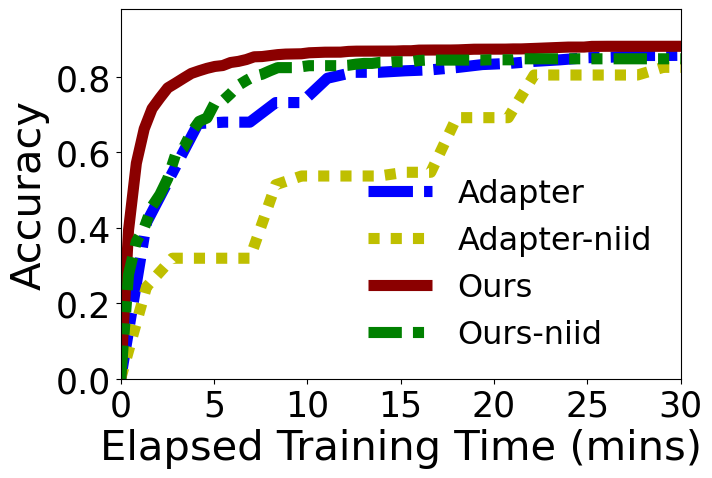

In [3]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "agnews"
model = "distilbert"

logging_file = {
    "Ours":"./distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_1000_numerical.log",
    "Ours-niid":"./distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_1000_numerical_niid.log",
    "Adapter":"./distilbert_agnews/fedsgd_distilbert_agnews_lr0.01_client_num_10_adapter.log",
    "Adapter-niid":"./distilbert_agnews/fedsgd_distilbert_agnews_lr0.01_client_num_10_adapter_niid.log"
    }

train_time_dict = {"Ours":0.3085584,'Ours-niid':0.3085584,'Adapter':4.1634,'Adapter-niid':4.1634}
local_data_num_dict = {"agnews":15,"yahoo":18}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
# linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
# colors=['darkred','g','b','y','c','m','k',"tan"] * 100
color_map = {'Ours': 'darkred','Ours-niid': 'g','Adapter': 'b','Adapter-niid': 'y','full': 'c'}
linestyle_map = {'Ours': (0, ()),'Ours-niid': (0, (3, 1, 1, 1, 1, 1)),'Adapter': (0, (4, 1, 1, 1)),'Adapter-niid': (0, (1, 1)),'full': (0, (2, 4))}
lw = 8

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list

def get_time_to_target_acc(target_acc,acc_list,time_list):
    n = len(acc_list)
    i = 0
    while i < n and acc_list[i] < target_acc:
        i += 1
    return time_list[i] if i<n else 10000    
method_list = ['Adapter','Adapter-niid','Ours','Ours-niid']
for i,method in enumerate(method_list):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        max_acc = 0
        for line in f:
            if "'acc':" in line:
                cur_acc = float(line[line.rfind("'acc':")+7:line.rfind(",")])
                if cur_acc > max_acc:
                    max_acc = cur_acc
                else:
                    cur_acc = max_acc
                acc.append(cur_acc)
        time_list = round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc)
        print(get_time_to_target_acc(0.84,acc,time_list))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle_map[method], color=color_map[method],label=method,linewidth=lw)
plt.xlabel("Elapsed Training Time (mins)",fontsize=30)
plt.ylabel("Accuracy",fontsize=30)
plt.xticks(size = 25)
plt.xlim(0,30)
plt.yticks(size = 25)
plt.ylim(0,0.98)
plt.legend(fontsize=23,frameon=False)
plt.subplots_adjust(right=1.0)  # 根据需要调整参数
# plt.title(f"{model} {dataset}",fontsize=30)
plt.savefig(f"/data/wyz/ForwardFL-Latex/figs/eval-niid-{model}-{dataset}.pdf", bbox_inches="tight")
# plt.show()

param_num: 105988
12.416921337890614
param_num: 105988
67.54805207812481
param_num: 105988
106.83687133789073
param_num: 105988
183.75941870117182


Text(0.5, 1.0, 'bert agnews')

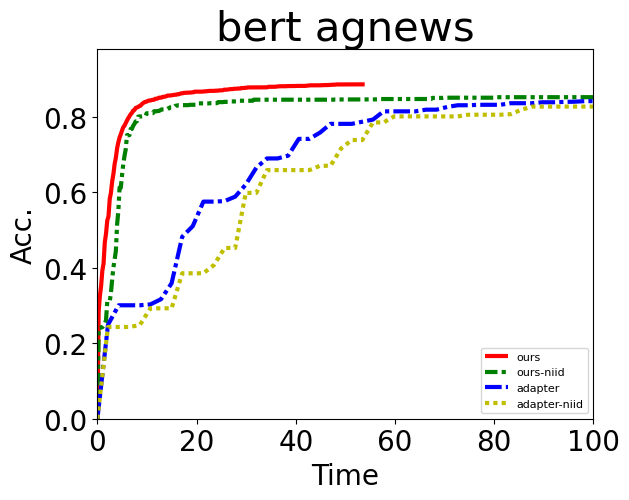

In [5]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "agnews"
model = "bert"

logging_file = {
    "ours":"./bert_agnews/fedFwd_bert_agnews_lr0.01_client_num_1000_numerical.log",
    "ours-niid":"./bert_agnews/fedFwd_bert_agnews_lr0.01_client_num_1000_numerical_niid.log",
    "adapter":"./bert_agnews/fedsgd_bert_agnews_lr0.01_client_num_10_bitfit.log",
    "adapter-niid":"./bert_agnews/fedsgd_bert_agnews_lr0.01_client_num_10_niid.log"
    }

train_time_dict = {"ours":0.669904,'ours-niid':0.669904,'adapter':8.2235,'adapter-niid':8.2235}
local_data_num_dict = {"agnews":15,"yahoo":18}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    
def get_time_to_target_acc(target_acc,acc_list,time_list):
    n = len(acc_list)
    i = 0
    while i < n and acc_list[i] < target_acc:
        i += 1
    return time_list[i] if i<n else 10000

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        max_acc = 0
        for line in f:
            if "'acc':" in line:
                cur_acc = float(line[line.rfind("'acc':")+7:line.rfind(",")])
                if cur_acc > max_acc:
                    max_acc = cur_acc
                else:
                    cur_acc = max_acc
                acc.append(cur_acc)
        time_list = round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc)
        print(get_time_to_target_acc(0.85,acc,time_list))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset}",fontsize=30)
# plt.savefig(f"/data/wyz/ForwardFL-Latex/figs/eval-niid-{model}-{dataset}.pdf", bbox_inches="tight")
# plt.show()